In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
print("The setup is ready")

/kaggle/input/data-analyst-jobs-datset/DataAnalystJobs.csv
The setup is ready


In [2]:
data=pd.read_csv('../input/data-analyst-jobs-datset/DataAnalystJobs.csv')
print(data.size)
print(data.shape)
data.head()

36048
(2253, 16)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


# Data Preparation

In [3]:
data.describe()    # We can see the statistical summary for the following variables, but only for feature with numbers

,Unnamed: 0,Rating,Founded
count,2253.0000,2253.000000,2253.000000
mean,1126.0000,3.160630,1398.522858
std,650.5294,1.665228,901.929251
min,0.0000,-1.000000,-1.000000
25%,563.0000,3.100000,-1.000000
50%,1126.0000,3.600000,1979.000000
75%,1689.0000,4.000000,2002.000000
max,2252.0000,5.000000,2019.000000


In [4]:
data.dtypes   # This function shows the datatype of each column

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [5]:
data.isnull().sum() # There are no null values, can be drop using df.dropna()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [6]:
data.duplicated()#no duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
2248    False
2249    False
2250    False
2251    False
2252    False
Length: 2253, dtype: bool

In [7]:
data.duplicated().sum()    # Also, there are no duplicate values to remove, if have, can be removed by df.drop_duplicates(subset=['xxx'])

0

# Univariate Analysis

In [8]:
data['Company Name'].value_counts().head(10)  # These are the Top 10 Companies offering data science jobs

Staffigo Technical Services, LLC\n5.0    58
Diverse Lynx\n3.9                        22
Kforce\n4.1                              19
Lorven Technologies Inc\n4.0             19
Robert Half\n3.5                         14
Avacend, Inc.\n2.5                       13
Mondo\n3.9                               11
Apex Systems\n3.8                        10
Apple\n4.1                               10
eTeam Inc.\n3.7                          10
Name: Company Name, dtype: int64

In [9]:
data['Job Title'].value_counts().head(20)  # These are the Top 20  data science job titles 

Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Analyst Junior         17
Data Analyst II             17
Data Quality Analyst        17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Data Analyst I              11
Data Analyst III            11
Marketing Data Analyst       9
Sr Data Analyst              9
Data Management Analyst      8
Data Warehouse Analyst       8
Data Science Analyst         7
Technical Data Analyst       7
Name: Job Title, dtype: int64

In [10]:
data['Salary Estimate'].value_counts().head(10)  # The Top 10 Salary packages for Data Science Field Jobs

$42K-$76K (Glassdoor est.)     57
$41K-$78K (Glassdoor est.)     57
$50K-$86K (Glassdoor est.)     41
$35K-$67K (Glassdoor est.)     33
$43K-$76K (Glassdoor est.)     31
$58K-$93K (Glassdoor est.)     31
$60K-$124K (Glassdoor est.)    31
$37K-$66K (Glassdoor est.)     30
$37K-$68K (Glassdoor est.)     30
$60K-$66K (Glassdoor est.)     30
Name: Salary Estimate, dtype: int64

In [11]:
data['Location'].value_counts().head(25)  # Most Job offered Locations in the World in Data Science field

New York, NY          310
Chicago, IL           130
San Francisco, CA     119
Austin, TX             81
Los Angeles, CA        80
Charlotte, NC          78
Houston, TX            72
Dallas, TX             66
San Diego, CA          62
Philadelphia, PA       56
Denver, CO             47
San Antonio, TX        45
San Jose, CA           38
Phoenix, AZ            35
Jersey City, NJ        33
Tempe, AZ              31
Seattle, WA            30
Irving, TX             29
Columbus, OH           29
Plano, TX              28
Santa Clara, CA        22
Salt Lake City, UT     22
El Segundo, CA         19
Jacksonville, FL       19
San Mateo, CA          18
Name: Location, dtype: int64

In [12]:
data['Type of ownership'].value_counts().head(10)  # Private Companies more offers jobs as compared to other organizations

Company - Private                 1273
Company - Public                   452
-1                                 163
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Name: Type of ownership, dtype: int64

# Univariate Visualizations & Graphs

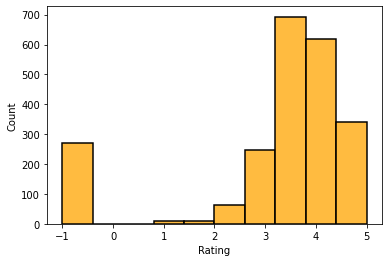

In [13]:
sns.histplot(x='Rating', data=data, color='orange', linewidth=1.5, bins=10)
plt.show() 

# Hence, Maximum ratings are in the range of 3 to 4 and 5

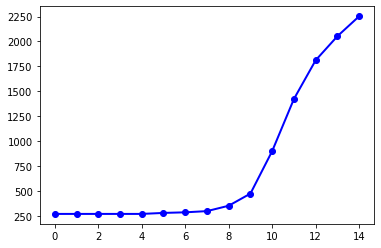

In [14]:
values,base=np.histogram(data['Rating'], bins=15)
print
cumulative=np.cumsum(values)

plt.plot(cumulative,color="blue",marker="o", linewidth=2)
plt.show()

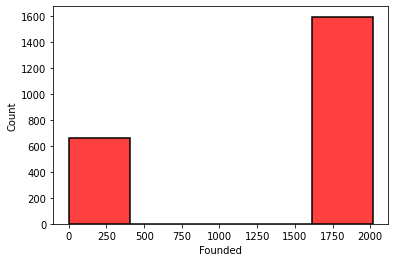

In [15]:
sns.histplot(x='Founded', data=data, color='red', linewidth=1.5, bins=5)
plt.show() 

# Majority of the companies were founded from 1800 t0 2000

# Multivariate Analysis

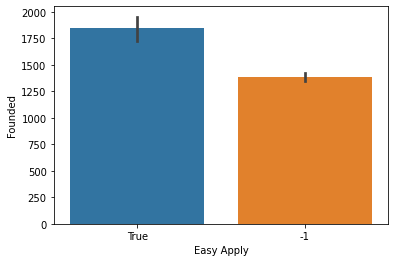

In [16]:
sns.barplot(y='Founded',x='Easy Apply',data=data)
plt.show()

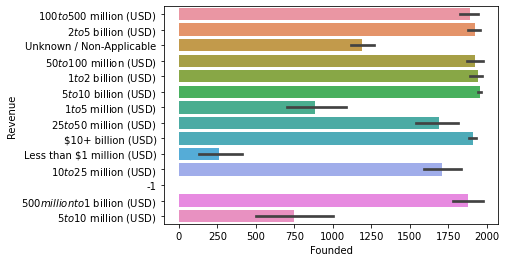

In [17]:
sns.barplot(x='Founded',y='Revenue',data=data)
plt.show()

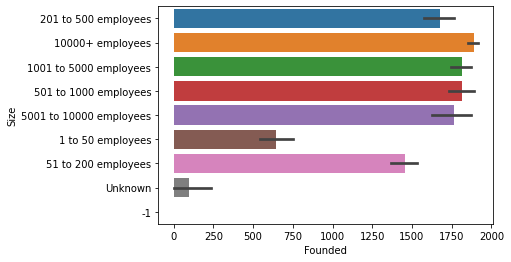

In [18]:
sns.barplot(x='Founded',y='Size',data=data)
plt.show()

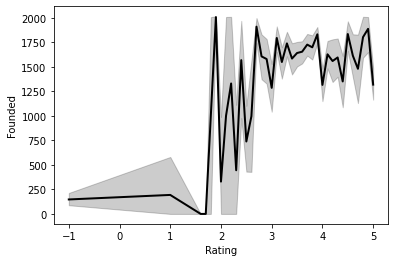

In [19]:
sns.lineplot(x='Rating',y='Founded',data=data, color='black', linewidth=2)
plt.show()

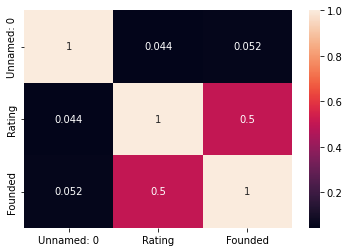

In [20]:
sns.heatmap(data.corr(), annot=True)
plt.show()